In [1]:
!pip install mapclassify
!pip install libpysal
!pip install geopandas

     |████████████████████████████████| 2.4MB 4.9MB/s 
     |████████████████████████████████| 1.0MB 5.4MB/s 
     |████████████████████████████████| 6.6MB 26.7MB/s 
     |████████████████████████████████| 15.4MB 239kB/s 


In [32]:
!pip install matplotlib==3.1

In [4]:
import numpy as np
import mapclassify
import pandas as pd
import libpysal as ps
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
#### Librerias de uso
# =========================================================================================================================
import shapely
import seaborn as sns
from shapely.geometry import Polygon, Point

## Figuras
# =========================================================================================================================
mpl.rcParams["figure.figsize"] = (12,12)
sns.set_context("paper")

## Vecinos mas cercanos
# =========================================================================================================================
from scipy.spatial import cKDTree

In [5]:
!pip install contextily

     |████████████████████████████████| 19.3MB 1.3MB/s 


In [7]:
!pip install rtree
import rtree
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-c1ouya_l
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-c1ouya_l
  Created wheel for geopandas: filename=geopandas-0.9.0+34.g863afe9-py2.py3-none-any.whl size=996324 sha256=8f366fe0367c7bc00c1108f7448650627bb695e4ecb5ef18548babf34690cfff
  Stored in directory: /tmp/pip-ephem-wheel-cache-6kn7qcuv/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [8]:
import matplotlib.patches as mpatches
import contextily as ctx

In [37]:
AGEBS= gpd.read_file('/content/drive/MyDrive/2. 2021/ZM_LEON/AGEB_ZM_Leon_censo2.shp')
print ('Forma de los datos:',AGEBS.shape)

Forma de los datos: (797, 10)


In [38]:
AGEBS.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
Area_Verde= gpd.read_file('/content/drive/MyDrive/2. 2021/ZM_LEON/ZM_Leon_AV_Merge.shp')
Area_Verde = Area_Verde.rename({'CVEGEO':'Clave_AGEB'}, axis=1)
Area_Verde.head()

,id,Nombre,Area,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_LOC,CONDICION,GEOGRAFICO,NOMSERV,TIPO,CVE_SERV,AMBITO,full_id,osm_id,osm_type,leisure,name,type,Colonia,landuse,descriptio,colonia_1,designatio,addr_city,addr_house,addr_postc,addr_stree,leaf_type,natural,lit,access,email,opening_ho,operator,layer,path,geometry
0,1.0,CanchasFut,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Parque_puntos,C:\Users\maris\Desktop\Jupyter\ZM_Leon_shapes\...,"POLYGON ((2563625.967 988206.215, 2563717.002 ..."
1,2.0,Zona reforestacion,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Parque_puntos,C:\Users\maris\Desktop\Jupyter\ZM_Leon_shapes\...,"POLYGON ((2558541.267 996080.224, 2558731.363 ..."
2,2.0,Parque Santa Lucia 3,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Parque_puntos,C:\Users\maris\Desktop\Jupyter\ZM_Leon_shapes\...,"POLYGON ((2541412.014 1005504.883, 2541409.006..."
3,4.0,Parque Santa Lucia,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Parque_puntos,C:\Users\maris\Desktop\Jupyter\ZM_Leon_shapes\...,"POLYGON ((2541280.431 1005549.093, 2541287.233..."
4,5.0,Canchas,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Parque_puntos,C:\Users\maris\Desktop\Jupyter\ZM_Leon_shapes\...,"POLYGON ((2539172.309 1008847.612, 2539193.585..."


In [40]:
Area_Verde.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
Pobreza_ageb = pd.read_csv ('/content/drive/MyDrive/2. 2021/ZM_LEON/RangoPobreza_LeonZM_new.csv')
Pobreza_ageb.head(5)

,cve_ent,nom_ent,cve_mun,nom_mun,cvegeo,cve_ageb,pobreza,pobreza_ext
0,11,Guanajuato,11020,Leon,1102000000000,0000,"(18, 34)","(0, 20)"
1,11,Guanajuato,11020,Leon,1102000010143,0143,"(18, 34)","(0, 20)"
2,11,Guanajuato,11020,Leon,1102000010181,0181,"(18, 34)","(0, 20)"
3,11,Guanajuato,11020,Leon,1102000010251,0251,"(18, 34)","(0, 20)"
4,11,Guanajuato,11020,Leon,1102000010270,0270,"(18, 34)","(0, 20)"


In [42]:
AGEBS= AGEBS.rename({'CVEGEO':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'cvegeo':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'pobreza':'Rango_Pobreza'}, axis=1)
Pobreza_ageb= Pobreza_ageb.rename({'pobreza_ext':'Rango_PExtrema'}, axis=1)

In [43]:
Pobreza_ageb=Pobreza_ageb.dropna()

In [44]:
Pobreza_ageb['Min_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('(\d+)').astype(int)
Pobreza_ageb['Max_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('( \d+)').astype(int)
Pobreza_ageb['Pobre_AV'] = ((Pobreza_ageb['Min_RP'] + Pobreza_ageb['Max_RP']) / 2)
Pobreza_ageb2 = Pobreza_ageb[['Clave_AGEB','nom_mun', 'Rango_Pobreza', 'Pobre_AV' ]]

In [45]:
Pobreza_ageb2.set_index('Clave_AGEB')
AGEBS.set_index('Clave_AGEB')

,CVE_ENT,CVE_MUN,CVE_AGEB,POBTOT,POBFEM,POBMAS,P_6A11,PCON_DISC,geometry
Clave_AGEB,,,,,,,,,
1103700011083,11,037,1083,10,0,0,0,0,"POLYGON ((2561453.820 993198.977, 2561433.546 ..."
110370019105A,11,037,105A,5,0,0,0,0,"POLYGON ((2557132.016 996807.810, 2557169.761 ..."
1103700241079,11,037,1079,0,0,0,0,0,"POLYGON ((2554496.562 1005752.397, 2554483.340..."
1103700241064,11,037,1064,5,0,0,0,0,"POLYGON ((2554094.826 1006325.869, 2554068.088..."
1103700010329,11,037,0329,2674,1253,1396,249,47,"POLYGON ((2560671.896 992420.641, 2560655.693 ..."
...,...,...,...,...,...,...,...,...,...
1102004137827,11,020,7827,1722,848,862,203,38,"POLYGON ((2537213.768 1000910.999, 2537134.862..."
1102004137831,11,020,7831,1032,470,533,133,32,"POLYGON ((2537213.768 1000910.999, 2537234.432..."
1102004297846,11,020,7846,3028,1458,1548,446,50,"POLYGON ((2538712.682 1000130.509, 2538788.806..."


In [46]:
Pobreza_AGEB = AGEBS.merge(Pobreza_ageb2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')
print ('Forma de los datos:',Pobreza_AGEB.shape)
Pobreza_AGEB.head()

Forma de los datos: (797, 13)


,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_AGEB,POBTOT,POBFEM,POBMAS,P_6A11,PCON_DISC,geometry,nom_mun,Rango_Pobreza,Pobre_AV
0,1103700011083,11,037,1083,10,0,0,0,0,"POLYGON ((2561453.820 993198.977, 2561433.546 ...",NaN,NaN,NaN
1,110370019105A,11,037,105A,5,0,0,0,0,"POLYGON ((2557132.016 996807.810, 2557169.761 ...",NaN,NaN,NaN
2,1103700241079,11,037,1079,0,0,0,0,0,"POLYGON ((2554496.562 1005752.397, 2554483.340...",NaN,NaN,NaN
3,1103700241064,11,037,1064,5,0,0,0,0,"POLYGON ((2554094.826 1006325.869, 2554068.088...",NaN,NaN,NaN
4,1103700010329,11,037,0329,2674,1253,1396,249,47,"POLYGON ((2560671.896 992420.641, 2560655.693 ...",Silao de la Victoria,"(70, 100)",85.0


In [47]:
Pobreza_AGEB = Pobreza_AGEB.dropna()

In [48]:
mapclassify.NaturalBreaks(Pobreza_AGEB['Pobre_AV'].values, k=5)

NaturalBreaks         

   Interval      Count
----------------------
[ 9.00,  9.00] |   147
( 9.00, 26.00] |   149
(26.00, 42.00] |   133
(42.00, 60.00] |    86
(60.00, 85.00] |    26

In [49]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg=3857)

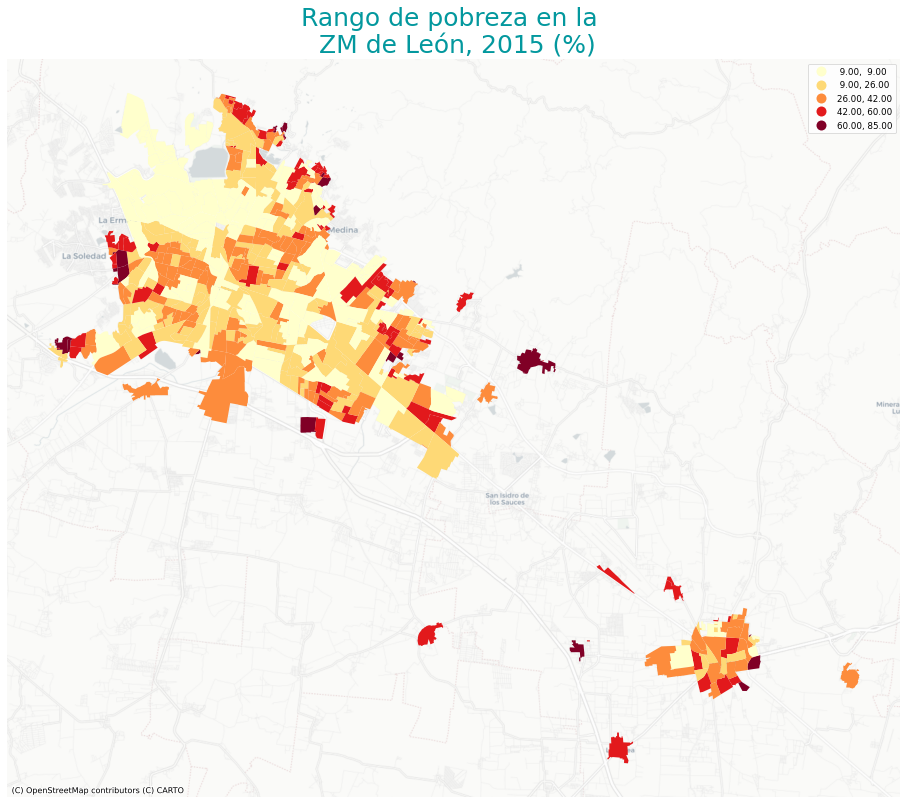

In [54]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de pobreza en la \n ZM de León, 2015 (%)",  fontsize=25, color = '#03989e')
ax.set_axis_off() 
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

In [55]:
Pobreza_AGEB["POBTOT"]=Pobreza_AGEB.POBTOT.astype(int)

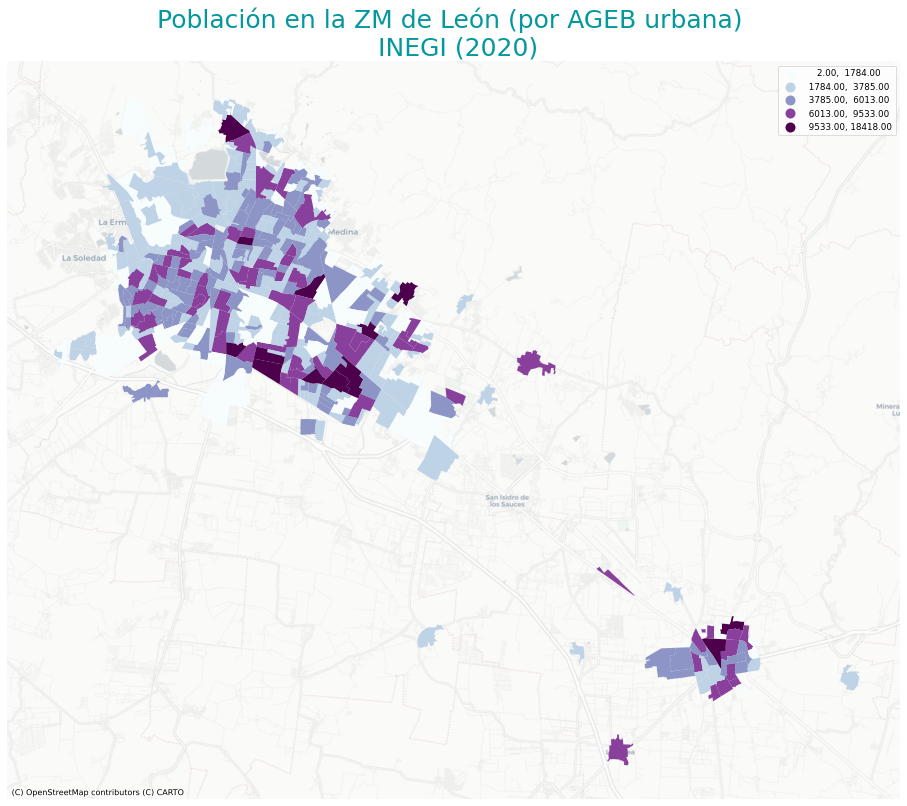

In [53]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_AGEB.plot(column='POBTOT', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='BuPu',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Población en la ZM de León (por AGEB urbana) \n INEGI (2020)", fontsize=25, color = '#03989e')
ax.set_axis_off() 
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

In [56]:
colors = ['#A1E2E6', '#E6BDA1', '#B3A16B', '#678072', '#524A4A']

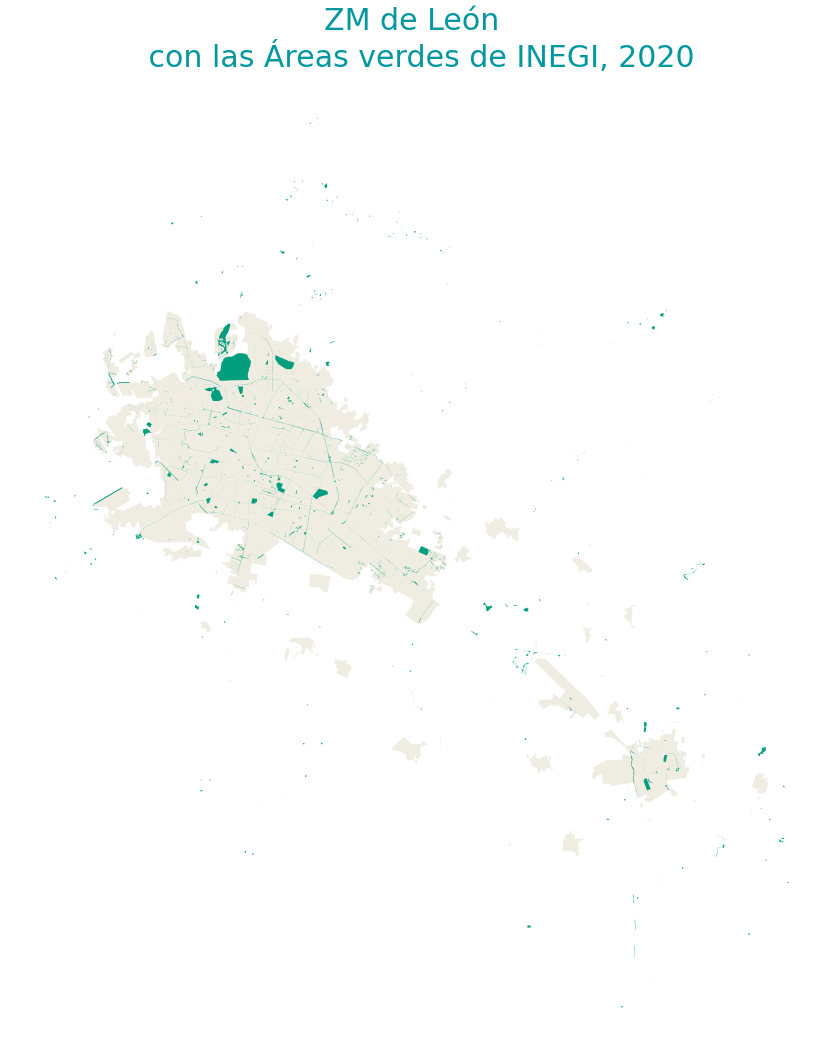

In [59]:
Parques_Juarez= AGEBS.plot(color= colors[2], alpha=.2, figsize=(16, 18))
Area_Verde.plot(ax=Parques_Juarez, color= '#039e7d',linewidth= 1.5)
plt.title("ZM de León \n con las Áreas verdes de INEGI, 2020", fontsize=30, color= '#03989e')
plt.axis('off')
plt.show()

In [60]:
AreaV_INEGI=Area_Verde.to_crs(epsg=3857)

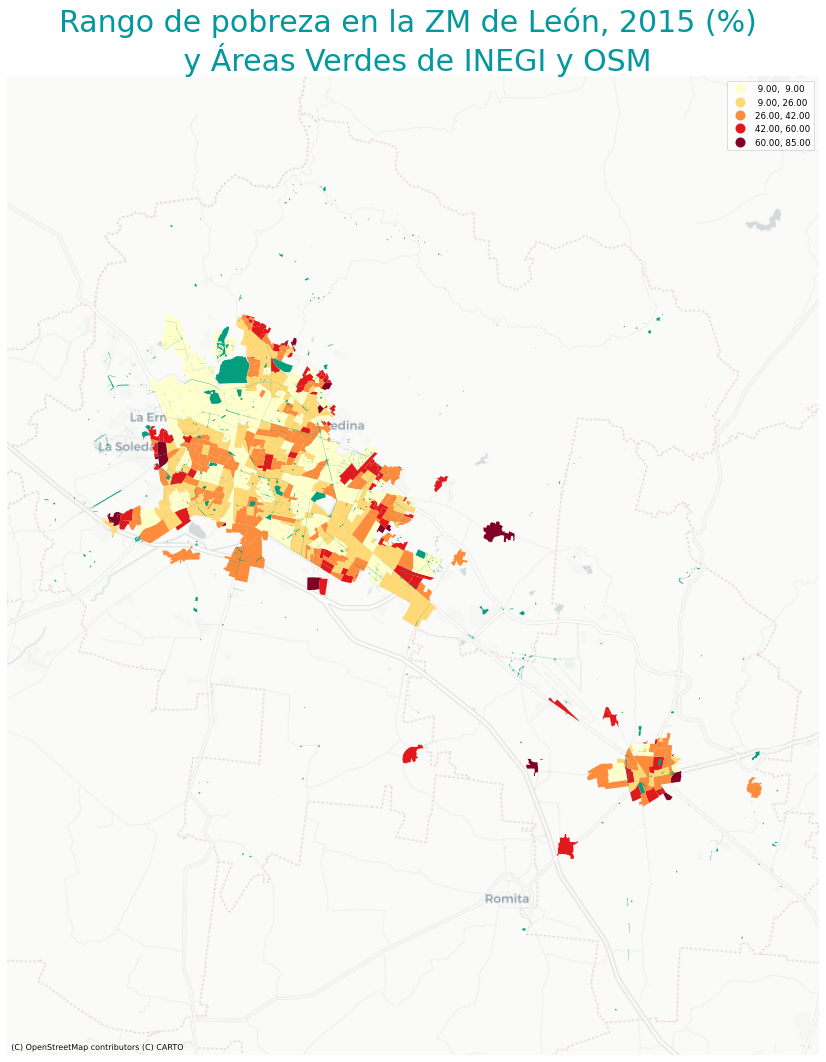

In [62]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en la ZM de León, 2015 (%) \n y Áreas Verdes de INEGI y OSM", fontsize=30, color = '#03989e')
ax.set_axis_off() 
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

In [63]:
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re

In [64]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-8mb0bou1
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-8mb0bou1
  Created wheel for geopandas: filename=geopandas-0.9.0+34.g863afe9-py2.py3-none-any.whl size=996324 sha256=b035f572d579780e35614ad69a4f085561ab6f7dc2e2edca8cf3fc794d4c937a
  Stored in directory: /tmp/pip-ephem-wheel-cache-1bw340gn/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [65]:
Leon_Region = gpd.overlay(Pobreza_AGEB, AreaV_INEGI[['Clave_AGEB', 'geometry']], how='intersection')
Leon_Region.head()

ImportError: ignored

In [ ]:
Leon_Region.plot(color='grey')

In [ ]:
Leon_Region['area'] = Leon_Region['geometry'].to_crs(32614).area
area_parque = Leon_Region.groupby('Clave_AGEB_1')[['area']].sum()
area_parque.head(3)

In [ ]:
area_parque = area_parque.join(AGEBS.set_index('Clave_AGEB'), how='right')
area_parque = gpd.GeoDataFrame(area_parque)
area_parque.head(3)

In [ ]:
area_parque = (area_parque.fillna(0)) 
fig, ax = plt.subplots(figsize=(12, 12))
ax = area_parque.plot(ax=ax, column='area', legend=True, legend_kwds={'shrink': 0.3}, alpha=0.8)
ax.set(title='Área de parque por hexágono Hex9')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=area_parque.crs.to_string())

In [ ]:
parques_centroides = AreaV_INEGI.copy()
parques_centroides['area'] = parques_centroides.to_crs(32614).area
parques_centroides['geometry'] = parques_centroides.to_crs(32614).centroid.to_crs(4326)
parques_centroides= parques_centroides[['name','area', 'geometry']]
parques_centroides.head(4)

In [ ]:
Region_UIO3_points = AGEBS.copy()
Region_UIO3_points['geometry'] = Region_UIO3_points.to_crs(32614).centroid
Region_UIO3_points.head(2)

In [ ]:
def k_nearest_points(dfA, dfB, k):
    # =========================================================================================================================
    # Ajustamos los índices
    # =========================================================================================================================
    dfA = dfA.reset_index(drop=True)
    dfB = dfB.reset_index(drop=True)
    # =========================================================================================================================
    # Obtenemos los arrays de coordenadas
    # =========================================================================================================================
    n_A = np.array(list(dfA.geometry.apply(lambda x: (x.x, x.y))))
    n_B = np.array(list(dfB.geometry.apply(lambda x: (x.x, x.y))))
    # =========================================================================================================================
    # instanciamos el árbol
    # =========================================================================================================================
    btree = cKDTree(n_B)
    # =========================================================================================================================
    # hacemos el query de knn (k=n_numero de vecinos)
    # =========================================================================================================================
    dist, idx = btree.query(n_A, k=k)
    dfs = []
    for index, row in dfA.iterrows():
        vecinos = idx[index]
        distancias = dist[index]
        tmp = pd.DataFrame({'index_left': index, 'index_right': vecinos, 'distancia': distancias})
        dfs.append(tmp)
    resultado = pd.concat(dfs)
    return (resultado)

In [ ]:
distancias_vecinos_6 = k_nearest_points(Region_UIO3_points.to_crs(32614), parques_centroides.to_crs(32614), 6)
distancias_vecinos_6 = (Region_UIO3_points.reset_index(drop=True)
                         .merge(distancias_vecinos_6, left_index=True, right_on='index_left')
                         .merge(parques_centroides.reset_index(drop=True), left_on='index_right', right_index=True)
                         .loc[:, ['Clave_AGEB' , 'index_left', 'name', 'index_right', 'distancia']]
                         .rename({'index_left': 'index_points','index_right':'index_parque'}, axis=1)
                        )
print ("k nearest points: ", distancias_vecinos_6.shape)
print ("%==========================================")
print ("Datos KNN cercanos")
print ("%==========================================")
distancias_vecinos_6.head(3)

In [ ]:
area_parque_hex2 = area_parque.copy()
area_parque_hex2 = area_parque_hex2[['area']]
area_parque_hex2.head(2)

In [ ]:
accesibilidad_parque_hex = (area_parque_hex2.merge(distancias_vecinos_6, left_index=True, right_on='Clave_AGEB')
 .merge(parques_centroides.reset_index(drop=True)[['area']], left_on='index_parque', right_index=True)
.rename({'area_x':'area_0','area_y':'area'}, axis=1))
accesibilidad_parque_hex['termino'] = accesibilidad_parque_hex['area'] / accesibilidad_parque_hex['distancia']**2
accesibilidad_parque_hex.head(2)

In [ ]:
accesibilidad_parque_hex = accesibilidad_parque_hex.groupby('Clave_AGEB')[['termino']].sum()
area_parque_hex_02 = area_parque.join(accesibilidad_parque_hex, on='Clave_AGEB')

In [ ]:
# =========================================================================================================================
import mapclassify as mcf

# =========================================================================================================================
mcf.Quantiles(area_parque_hex_02['termino'].values, k=10)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))
ax = area_parque_hex_02.plot(ax=ax, column='termino',
                                            legend=True,
                                            alpha=0.8,
                                            scheme='Quantiles',
                                            cmap='viridis',
                                            classification_kwds={'k':10})
ax.set(title='Accesibilidad a áreas verdes por hexágono (nivel 9)')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=area_parque_hex_02.crs.to_string())

In [ ]:
!pip install h3
from h3 import h3

In [ ]:
import pyproj

center = Point(h3.h3_to_geo('8849864805fffff')[::-1])
vertex = Point(h3.h3_to_geo_boundary('8849864805fffff')[0][::-1])
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:32614')
project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
utm_center = shapely.ops.transform(project, center)
utm_vertex = shapely.ops.transform(project, vertex)
min_distance = utm_center.distance(utm_vertex)
min_distance

In [ ]:
distancias_vecinos_6.loc[distancias_vecinos_6.distancia < min_distance,'distancia'] = min_distance

In [ ]:
accesibilidad_parque_hex_02 = (area_parque_hex2.merge(distancias_vecinos_6, left_index=True, right_on='Clave_AGEB')
 .merge(parques_centroides.reset_index(drop=True)[['area']], left_on='index_parque', right_index=True)
.rename({'area_x':'area_0','area_y':'area'}, axis=1))
accesibilidad_parque_hex_02.shape
accesibilidad_parque_hex_02.head()

In [ ]:
accesibilidad_parque_hex_02['termino'] = accesibilidad_parque_hex_02['area'] / accesibilidad_parque_hex_02['distancia']**2
accesibilidad_parque_hex_02 = accesibilidad_parque_hex_02.groupby('Clave_AGEB')[['termino']].sum()

In [ ]:
area_parque_hex_03 = area_parque.join(accesibilidad_parque_hex_02, on='Clave_AGEB')
area_parque_hex_03.head(3)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = area_parque_hex_03.plot(ax=ax, column='termino',
                                            legend=True,
                                            alpha=0.8,
                                            scheme='Quantiles',
                                            cmap='viridis',
                                            classification_kwds={'k':10})
ax.set(title='Accesibilidad a áreas verdes Monterrey \n Hexágono - Nivel 9')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=area_parque_hex_03.crs.to_string())

In [ ]:
!pip install folium
import folium

In [ ]:
area_parque_hex_03=area_parque_hex_03.reset_index()
area_parque_hex_03.to_file("area_parque_hex_03.geojson", driver='GeoJSON')

In [ ]:
Pobreza_AGEB.to_file("Pobreza_AGEB.geojson", driver='GeoJSON')

In [ ]:
from folium import Choropleth

In [ ]:
m = folium.Map([25.538724,-103.429413], zoom_start=11, tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Pobreza_AGEB,
    name="Pobreza",
    columns=["Clave_AGEB", "Pobre_AV"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="YlOrRd",
    fill_opacity=1,
    line_opacity=0.5,
    legend_name="Pobreza (%)",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='red' 
).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=area_parque_hex_03,
    name="Accesibilidad",
    columns=["Clave_AGEB", "termino"],
    key_on="feature.properties.Clave_AGEB",
    scheme='quantiles',
    fill_color="YlGnBu",
    fill_opacity=1,
    line_opacity=0.7,
    legend_name="Accesibilidad",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='purple',
    classification_kwds={'k':10} 
).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Pobreza_AGEB,
    name="Población",
    columns=["Clave_AGEB", "POBTOT"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="BuPu",
    fill_opacity=1,
    line_opacity=0.5,
    legend_name="Población",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='blue' 
).add_to(m)
folium.features.GeoJson(AreaV_INEGI,
            name='Áreas Verdes',
           style_function=lambda feature :{'fillColor': 'green',
        'color': 'green',
        'weight': .9,
        'dashArray': '5, 5'},show=True).add_to(m)
folium.Marker(location=[25.538724,-103.429413], popup='Nuevo Parque', draggable=True).add_to(m)

folium.LayerControl(collapsed=True).add_to(m)
m